In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from PIL import Image
import os
from string import digits
import sys
from sklearn.model_selection import train_test_split





D:\Anaconda3\envs\tf\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
image_path = 'Orchid_Images' 

# These are all the possible classes in our data set 
with open("Species.txt") as f:
    remove_digits = str.maketrans('', '', digits)
    CLASSES = f.read().translate(remove_digits).strip()
    CLASSES = CLASSES.replace("\n", "").split("	")
#     CLASSES.insert(0, None) #add to match the class labels 
    f.close()


print(type(CLASSES))
for label, value in enumerate(CLASSES):
    print(label, value)
# print(CLASSES)


<class 'list'>
0 Amerorchis rotundifolia
1 Aplectrum hyemale
2 Arethusa bulbosa
3 Bletia patula
4 Bletia purpurea
5 Brassia caudataÂ 
6 Calopogon barbatus
7 Calopogon multiflorus
8 Calopogon oklahomensis
9 Calopogon pallidus
10 Calopogon tuberosus
11 Calypso bulbosa
12 Cephalanthera austiniae
13 Cleistesiopsis bifaria
14 Cleistesiopsis divaricata
15 Cleistesiopsis oricamporum
16 Coeloglossum viride
17 Corallorhiza bentleyi
18 Corallorhiza maculata
19 Corallorhiza mertensiana
20 Corallorhiza odontorhiza
21 Corallorhiza striata
22 Corallorhiza trifida
23 Corallorhiza wisteriana
24 Cranichis muscosa
25 Cyclopogon elatus
26 Cypripedium acaule
27 Cypripedium arietinum
28 Cypripedium californicum
29 Cypripedium candidum
30 Cypripedium fasciculatum
31 Cypripedium montanum
32 Cypripedium parviflorum
33 Cypripedium passerinum
34 Cypripedium reginae
35 Cypripedium yatabeanum
36 CypripediumÂ guttatum
37 Cyrtopodium flavum
38 Cyrtopodium punctatum
39 Dactylorhiza aristataÂ 
40 Dactylorhiza viridis

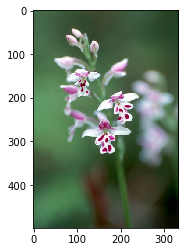

33    373
27    332
11    249
19    245
53    193
     ... 
85      3
88      3
57      3
9       3
83      3
Name: Class, Length: 156, dtype: int64
Cypripedium passerinum


In [3]:
df = pd.read_csv('ClassLabels.txt')
df

#iloc is for columns, loc is df.loc[<row #>, <column name>]
img = mpimg.imread(f'{image_path}/{df.iloc(0)[1][0]}')
plt.imshow(img)
plt.show()

class_counts = df['Class'].value_counts()
print(class_counts)
print(CLASSES[33])
# plt.hist(df['Class'].unique(),class_counts)
# plt.xticks(np.arange(0, 157, 10))

# d = df.groupby('Class').count()
# print(d)
# print(df['Class'].unique())

From the observation above, there is not a balanced frequency between the flower species. We can see that Species 33 - Cypripedium parviflorum has a frequency of 373 while 83, 57, 85.. all have low frequencies of 3.

In [4]:
# df.index +=1
df


,Image,Class
0,1.jpg,1
1,2.jpg,1
2,3.jpg,1
3,4.jpg,1
4,5.jpg,1
...,...,...
7151,7152.jpeg,63
7152,7153.jpeg,63
7153,7154.jpeg,63
7154,7155.jpg,63


In [5]:
train, test = train_test_split(df, test_size=0.3)
train_images = train['Image'].tolist()
train_labels = train['Class'].tolist()
test_images = test['Image'].tolist()
test_labels = test['Class'].tolist()

train_images
test_labels

[66,
 33,
 145,
 100,
 22,
 103,
 59,
 3,
 7,
 117,
 45,
 107,
 19,
 31,
 37,
 13,
 35,
 51,
 45,
 142,
 119,
 56,
 50,
 135,
 110,
 96,
 45,
 32,
 33,
 45,
 51,
 28,
 56,
 125,
 125,
 54,
 20,
 53,
 106,
 33,
 50,
 33,
 110,
 50,
 86,
 96,
 20,
 64,
 95,
 52,
 64,
 11,
 100,
 27,
 99,
 115,
 17,
 53,
 99,
 100,
 26,
 100,
 53,
 22,
 33,
 64,
 110,
 100,
 89,
 12,
 68,
 56,
 145,
 15,
 27,
 51,
 73,
 11,
 27,
 19,
 141,
 114,
 29,
 21,
 100,
 27,
 145,
 32,
 94,
 17,
 128,
 11,
 108,
 53,
 133,
 56,
 27,
 135,
 50,
 41,
 24,
 147,
 22,
 89,
 135,
 19,
 19,
 110,
 96,
 24,
 94,
 30,
 5,
 65,
 53,
 64,
 125,
 60,
 64,
 33,
 19,
 29,
 89,
 50,
 56,
 4,
 108,
 35,
 12,
 35,
 52,
 145,
 116,
 64,
 128,
 64,
 107,
 23,
 51,
 27,
 155,
 132,
 145,
 28,
 53,
 78,
 96,
 12,
 19,
 23,
 30,
 111,
 33,
 69,
 117,
 100,
 145,
 91,
 41,
 35,
 99,
 130,
 115,
 19,
 128,
 27,
 107,
 56,
 33,
 50,
 27,
 106,
 50,
 148,
 3,
 139,
 12,
 106,
 133,
 114,
 129,
 145,
 103,
 53,
 133,
 54,
 19,
 95,
 145,
 

Start..
4725.jpg
(70, 70, 3)
41.jpg
(70, 70, 3)
5978.jpg
(70, 70, 3)
2565.jpg
(70, 70, 3)
1629.jpg
(70, 70, 3)
945.jpg
(70, 70, 3)
4367.jpg
(70, 70, 3)
5722.jpg
(70, 70, 3)
532.jpg
(70, 70, 3)
806.jpg
(70, 70, 3)
415.jpg
(70, 70, 3)
2301.jpg
(70, 70, 3)
5203.jpg
(70, 70, 3)
3491.jpg
(70, 70, 3)
3362.jpg
(70, 70, 3)
5936.jpg
(70, 70, 3)
4745.jpg
(70, 70, 3)
6981.jpg
(70, 70, 3)
6660.jpg
(70, 70, 3)
4063.jpg
(70, 70, 3)
2316.jpg
(70, 70, 3)
4541.jpg
(70, 70, 3)
6674.jpg
(70, 70, 3)
2104.jpg
(70, 70, 3)
2728.jpg
(70, 70, 3)
3264.jpg
(70, 70, 3)
4363.jpg
(70, 70, 3)
5755.jpg
(70, 70, 3)
4707.jpg
(70, 70, 3)
1964.jpg
(70, 70, 3)
6621.jpg
(70, 70, 3)
5787.jpg
(70, 70, 3)
1227.jpg
(70, 70, 3)
3444.jpg
(70, 70, 3)
4618.jpg
(70, 70, 3)
2578.jpg
(70, 70, 3)
6843.jpg
(70, 70, 3)
2385.jpg
(70, 70, 3)
1574.jpg
(70, 70, 3)
1929.jpg
(70, 70, 3)
6396.jpg
(70, 70, 3)
3388.jpg
(70, 70, 3)
5010.jpg
(70, 70, 3)
3747.jpg
(70, 70, 3)
59.jpg
(70, 70, 3)
6895.jpg
(70, 70, 3)
1634.jpg
(70, 70)
4742.jpg
(70, 70

(70, 70, 3)
6123.jpg
(70, 70, 3)
451.jpg
(70, 70, 3)
5564.jpg
(70, 70, 3)
2010.jpg
(70, 70, 3)
4527.jpg
(70, 70, 3)
3693.jpg
(70, 70, 3)
1142.jpg
(70, 70, 3)
6979.jpg
(70, 70, 3)
5566.jpg
(70, 70, 3)
5213.jpg
(70, 70, 3)
1422.jpg
(70, 70, 3)
1169.jpg
(70, 70, 3)
6854.jpg
(70, 70, 3)
383.jpg
(70, 70, 3)
933.jpg
(70, 70, 3)
6934.jpg
(70, 70, 3)
4181.jpg
(70, 70, 3)
2895.jpg
(70, 70, 3)
5058.jpg
(70, 70, 3)
2448.jpg
(70, 70, 3)
5927.jpg
(70, 70, 3)
1447.jpg
(70, 70, 3)
3895.jpg
(70, 70, 3)
4287.jpg
(70, 70, 3)
6051.jpg
(70, 70, 3)
5689.jpg
(70, 70, 3)
2820.jpg
(70, 70, 3)
2612.jpg
(70, 70, 3)
4702.jpg
(70, 70, 3)
2965.jpg
(70, 70, 3)
5516.jpg
(70, 70, 3)
3055.jpg
(70, 70, 3)
1554.jpg
(70, 70, 3)
1778.jpg
(70, 70, 3)
5479.jpg
(70, 70, 3)
1320.jpg
(70, 70, 3)
2108.jpg
(70, 70, 3)
1154.jpg
(70, 70, 3)
3332.jpg
(70, 70, 3)
5247.jpg
(70, 70, 3)
5875.jpg
(70, 70, 3)
4985.jpg
(70, 70, 3)
3139.jpg
(70, 70, 3)
323.jpg
(70, 70, 3)
3642.jpg
(70, 70, 3)
6003.jpg
(70, 70, 3)
2826.jpg
(70, 70, 3)
3451.

(70, 70, 3)
4854.jpg
(70, 70, 3)
3405.jpg
(70, 70, 3)
2030.jpg
(70, 70, 3)
3228.jpg
(70, 70, 3)
5264.jpg
(70, 70, 3)
7033.jpg
(70, 70, 3)
5701.jpg
(70, 70, 3)
5594.jpg
(70, 70, 3)
5571.jpg
(70, 70, 3)
5881.jpg
(70, 70, 3)
1519.jpg
(70, 70, 3)
6296.jpg
(70, 70, 3)
3061.jpg
(70, 70, 3)
4634.jpg
(70, 70, 3)
595.jpg
(70, 70, 3)
6229.jpg
(70, 70, 3)
6291.jpg
(70, 70, 3)
1377.jpg
(70, 70, 3)
70.jpg
(70, 70, 3)
1535.jpg
(70, 70, 3)
3860.jpg
(70, 70, 3)
916.jpg
(70, 70, 3)
2613.jpg
(70, 70, 3)
5236.jpg
(70, 70, 3)
4629.jpg
(70, 70, 3)
5828.jpg
(70, 70, 3)
2142.jpg
(70, 70, 3)
4506.jpg
(70, 70, 3)
6477.jpg
(70, 70, 3)
3201.jpg
(70, 70, 3)
1113.jpg
(70, 70, 3)
6726.jpg
(70, 70, 3)
2966.jpg
(70, 70, 3)
4071.jpg
(70, 70, 3)
5376.jpg
(70, 70, 3)
6956.jpg
(70, 70, 3)
1998.jpg
(70, 70, 3)
1984.jpg
(70, 70, 3)
3738.jpg
(70, 70, 3)
6883.jpg
(70, 70, 3)
2573.jpg
(70, 70, 3)
1627.jpg
(70, 70, 3)
3963.jpg
(70, 70, 3)
2813.jpg
(70, 70, 3)
5462.jpg
(70, 70, 3)
1045.jpg
(70, 70, 3)
5104.jpg
(70, 70, 3)
1724.

(70, 70, 3)
3976.jpg
(70, 70, 3)
2468.jpg
(70, 70, 3)
2656.jpg
(70, 70, 3)
3773.jpg
(70, 70, 3)
203.jpg
(70, 70, 3)
5127.jpg
(70, 70, 3)
1078.jpg
(70, 70, 3)
19.jpg
(70, 70, 3)
185.jpg
(70, 70, 3)
5974.jpg
(70, 70, 3)
913.jpg
(70, 70, 3)
4866.jpg
(70, 70, 3)
668.jpg
(70, 70, 3)
5863.jpg
(70, 70, 3)
4755.jpg
(70, 70, 3)
6.jpg
(70, 70, 3)
4315.jpg
(70, 70, 3)
285.jpg
(70, 70, 3)
4103.jpg
(70, 70, 3)
5156.jpg
(70, 70, 3)
3634.jpg
(70, 70, 3)
5353.jpg
(70, 70, 3)
6032.jpg
(70, 70, 3)
1206.jpg
(70, 70, 3)
2176.jpg
(70, 70, 3)
2664.jpg
(70, 70, 3)
5662.jpg
(70, 70, 3)
4085.jpg
(70, 70, 3)
2508.jpg
(70, 70, 3)
7024.jpg
(70, 70, 3)
1346.jpg
(70, 70, 3)
4643.jpg
(70, 70, 3)
5254.jpg
(70, 70, 3)
4851.jpg
(70, 70, 3)
6108.jpg
(70, 70, 3)
3638.jpg
(70, 70, 3)
4626.jpg
(70, 70, 3)
4306.jpg
(70, 70, 3)
411.jpg
(70, 70, 3)
1453.jpg
(70, 70, 3)
3363.jpg
(70, 70, 3)
4434.jpg
(70, 70, 3)
5934.jpg
(70, 70, 3)
4194.jpg
(70, 70, 3)
3545.jpg
(70, 70, 3)
5778.jpg
(70, 70, 3)
6014.jpg
(70, 70, 3)
741.jpg
(70,

2234.jpg
(70, 70, 3)
4066.jpg
(70, 70, 3)
430.jpg
(70, 70, 3)
1101.jpg
(70, 70, 3)
2280.jpg
(70, 70, 3)
5591.jpg
(70, 70, 3)
2575.jpg
(70, 70, 3)
5631.jpg
(70, 70, 3)
3947.jpg
(70, 70, 3)
5115.jpg
(70, 70, 3)
5100.jpg
(70, 70, 3)
445.jpg
(70, 70, 3)
6703.jpg
(70, 70, 3)
586.jpg
(70, 70, 3)
222.jpg
(70, 70, 3)
6663.jpg
(70, 70, 3)
6473.jpg
(70, 70, 3)
6364.jpg
(70, 70, 3)
4235.jpg
(70, 70, 3)
3338.jpg
(70, 70, 3)
6186.jpg
(70, 70, 3)
4873.jpg
(70, 70, 3)
6305.jpg
(70, 70, 3)
3594.jpg
(70, 70, 3)
5386.jpg
(70, 70, 3)
2951.jpg
(70, 70, 3)
2878.jpg
(70, 70, 3)
3561.jpg
(70, 70, 3)
2921.jpg
(70, 70, 3)
1410.jpg
(70, 70, 3)
3787.jpg
(70, 70, 3)
6136.jpg
(70, 70, 3)
1954.jpg
(70, 70, 3)
4026.jpg
(70, 70, 3)
872.jpg
(70, 70, 3)
5109.jpg
(70, 70, 3)
2279.jpg
(70, 70, 3)
6446.jpg
(70, 70, 3)
574.jpg
(70, 70, 3)
4326.jpg
(70, 70, 3)
6059.jpg
(70, 70, 3)
246.jpg
(70, 70, 3)
2099.jpg
(70, 70, 3)
4686.jpg
(70, 70, 3)
2384.jpg
(70, 70, 3)
5914.jpg
(70, 70, 3)
1109.jpg
(70, 70, 3)
4959.jpg
(70, 70, 3)

(70, 70, 3)
4201.jpg
(70, 70, 3)
7118.jpeg
(70, 70, 3)
968.jpg
(70, 70, 3)
4456.jpg
(70, 70, 3)
5428.jpg
(70, 70, 3)
904.jpg
(70, 70, 3)
2550.jpg
(70, 70, 3)
2498.jpg
(70, 70, 3)
5896.jpg
(70, 70, 3)
6055.jpg
(70, 70, 3)
3750.jpg
(70, 70, 3)
304.jpg
(70, 70, 3)
546.jpg
(70, 70, 3)
606.jpg
(70, 70, 3)
2351.jpg
(70, 70, 3)
5027.jpg
(70, 70, 3)
6117.jpg
(70, 70, 3)
1358.jpg
(70, 70, 3)
3816.jpg
(70, 70, 3)
1034.jpg
(70, 70, 3)
3449.jpg
(70, 70, 3)
4399.jpg
(70, 70, 3)
226.jpg
(70, 70, 3)
4561.jpg
(70, 70, 3)
1890.jpg
(70, 70, 3)
3160.jpg
(70, 70, 3)
4057.jpg
(70, 70, 3)
2736.jpg
(70, 70, 3)
3730.jpg
(70, 70, 3)
3326.jpg
(70, 70, 3)
2944.jpg
(70, 70, 3)
4182.jpg
(70, 70, 3)
3622.jpg
(70, 70, 3)
1682.jpg
(70, 70, 3)
396.jpg
(70, 70, 3)
4358.jpg
(70, 70, 3)
5502.jpg
(70, 70, 3)
2931.jpg
(70, 70, 3)
5034.jpg
(70, 70, 3)
1559.jpg
(70, 70, 3)
4220.jpg
(70, 70, 3)
1071.jpg
(70, 70, 3)
5370.jpg
(70, 70, 3)
2490.jpg
(70, 70, 3)
5589.jpg
(70, 70, 3)
3483.jpg
(70, 70, 3)
1833.jpg
(70, 70, 3)
4407.jp

(70, 70, 3)
6451.jpg
(70, 70, 3)
3959.jpg
(70, 70, 3)
5619.jpg
(70, 70, 3)
2124.jpg
(70, 70, 3)
1716.jpg
(70, 70, 3)
3737.jpg
(70, 70, 3)
1286.jpg
(70, 70, 3)
6887.jpg
(70, 70, 3)
2300.jpg
(70, 70, 3)
2665.jpg
(70, 70, 3)
1539.jpg
(70, 70, 3)
4476.jpg
(70, 70, 3)
2548.jpg
(70, 70, 3)
7043.jpg
(70, 70, 3)
1469.jpg
(70, 70, 3)
1277.jpg
(70, 70, 3)
2942.jpg
(70, 70, 3)
2343.jpg
(70, 70, 3)
5253.jpg
(70, 70, 3)
1161.jpg
(70, 70, 3)
5781.jpg
(70, 70, 3)
2012.jpg
(70, 70, 3)
4751.jpg
(70, 70, 3)
6903.jpg
(70, 70, 3)
4823.jpg
(70, 70, 3)
4454.jpg
(70, 70, 3)
6845.jpg
(70, 70, 3)
3520.jpg
(70, 70, 3)
390.jpg
(70, 70, 3)
1236.jpg
(70, 70, 3)
5951.jpg
(70, 70, 3)
32.jpg
(70, 70, 3)
1664.jpg
(70, 70, 3)
6049.jpg
(70, 70, 3)
4966.jpg
(70, 70, 3)
3381.jpg
(70, 70, 3)
3558.jpg
(70, 70, 3)
932.jpg
(70, 70, 3)
2880.jpg
(70, 70, 3)
3552.jpg
(70, 70, 3)
4387.jpg
(70, 70, 3)
4198.jpg
(70, 70, 3)
5071.jpg
(70, 70, 3)
7105.jpg
(70, 70, 3)
5786.jpg
(70, 70, 3)
6356.jpg
(70, 70, 3)
3022.jpg
(70, 70, 3)
1503.

48.jpg
(70, 70, 3)
2484.jpg
(70, 70, 3)
6278.jpg
(70, 70, 3)
3104.jpg
(70, 70, 3)
87.jpg
(70, 70, 3)
1270.jpg
(70, 70, 3)
1543.jpg
(70, 70, 3)
101.jpg
(70, 70, 3)
4202.jpg
(70, 70, 3)
428.jpg
(70, 70, 3)
66.jpg
(70, 70, 3)
3574.jpg
(70, 70, 3)
3872.jpg
(70, 70, 3)
886.jpg
(70, 70, 3)
2627.jpg
(70, 70, 3)
3753.jpg
(70, 70, 3)
3029.jpg
(70, 70, 3)
5820.jpg
(70, 70, 3)
28.jpg
(70, 70, 3)
1776.jpg
(70, 70, 3)
1107.jpg
(70, 70, 3)
4900.jpg
(70, 70, 3)
7022.jpg
(70, 70, 3)
2347.jpg
(70, 70, 3)
6015.jpg
(70, 70, 3)
2530.jpg
(70, 70, 3)
2305.jpg
(70, 70, 3)
2684.jpg
(70, 70, 3)
2701.jpg
(70, 70, 3)
5706.jpg
(70, 70, 3)
4954.jpg
(70, 70, 3)
167.jpg
(70, 70, 3)
4703.jpg
(70, 70, 3)
6434.jpg
(70, 70, 3)
1947.jpg
(70, 70, 3)
225.jpg
(70, 70, 3)
145.jpg
(70, 70, 3)
5758.jpg
(70, 70, 3)
5530.jpg
(70, 70, 3)
1459.jpg
(70, 70, 3)
6804.jpg
(70, 70, 3)
4246.jpg
(70, 70, 3)
6198.jpg
(70, 70, 3)
5611.jpg
(70, 70, 3)
4131.jpg
(70, 70, 3)
2009.jpg
(70, 70, 3)
3929.jpg
(70, 70, 3)
322.jpg
(70, 70, 3)
984.jpg

(70, 70, 3)
1869.jpg
(70, 70, 3)
1192.jpg
(70, 70, 3)
1751.jpg
(70, 70, 3)
4894.jpg
(70, 70, 3)
6777.jpg
(70, 70, 3)
3058.jpg
(70, 70, 3)
356.jpg
(70, 70, 3)
331.jpg
(70, 70, 3)
1117.jpg
(70, 70, 3)
4424.jpg
(70, 70, 3)
2165.jpg
(70, 70, 3)
2894.jpg
(70, 70, 3)
3687.jpg
(70, 70, 3)
2591.jpg
(70, 70, 3)
881.jpg
(70, 70, 3)
3838.jpg
(70, 70, 3)
2973.jpg
(70, 70, 3)
533.jpg
(70, 70, 3)
6022.jpg
(70, 70, 3)
1584.jpg
(70, 70, 3)
4829.jpg
(70, 70, 3)
1982.jpg
(70, 70, 3)
552.jpg
(70, 70, 3)
1412.jpg
(70, 70, 3)
4069.jpg
(70, 70, 3)
5550.jpg
(70, 70, 3)
5569.jpg
(70, 70, 3)
4933.jpg
(70, 70, 3)
7056.jpg
(70, 70, 3)
2119.jpg
(70, 70, 3)
1619.jpg
(70, 70, 3)
4652.jpg
(70, 70, 3)
143.jpg
(70, 70, 3)
380.jpg
(70, 70, 3)
1550.jpg
(70, 70, 3)
601.jpg
(70, 70, 3)
3336.jpg
(70, 70, 3)
6959.jpg
(70, 70, 3)
5780.jpg
(70, 70, 3)
3138.jpg
(70, 70, 3)
4504.jpg
(70, 70, 3)
5463.jpg
(70, 70, 3)
1618.jpg
(70, 70, 3)
7005.jpg
(70, 70, 3)
6443.jpg
(70, 70, 3)
6445.jpg
(70, 70, 3)
6376.jpg
(70, 70, 3)
6241.jpg


(70, 70, 3)
5391.jpg
(70, 70, 3)
5449.jpg
(70, 70, 3)
3618.jpg
(70, 70, 3)
4480.jpg
(70, 70, 3)
5584.jpg
(70, 70, 3)
5478.jpg
(70, 70, 3)
1601.jpg
(70, 70, 3)
3473.jpg
(70, 70, 3)
6833.jpg
(70, 70, 3)
5487.jpg
(70, 70, 3)
183.jpg
(70, 70, 3)
3226.jpg
(70, 70, 3)
5225.jpg
(70, 70, 3)
4584.jpg
(70, 70, 3)
3629.jpg
(70, 70, 3)
5194.jpg
(70, 70, 3)
2619.jpg
(70, 70, 3)
2978.jpg
(70, 70, 3)
4832.jpg
(70, 70, 3)
4517.jpg
(70, 70, 3)
4404.jpg
(70, 70, 3)
3318.jpg
(70, 70, 3)
1648.jpg
(70, 70, 3)
5797.jpg
(70, 70, 3)
5043.jpg
(70, 70, 3)
3145.jpg
(70, 70, 3)
1974.jpg
(70, 70)
6742.jpg
(70, 70, 3)
2632.jpg
(70, 70, 3)
561.jpg
(70, 70, 3)
1340.jpg
(70, 70, 3)
1210.jpg
(70, 70, 3)
4296.jpg
(70, 70, 3)
3312.jpg
(70, 70, 3)
6214.jpg
(70, 70, 3)
2447.jpg
(70, 70, 3)
1617.jpg
(70, 70, 3)
5606.jpg
(70, 70, 3)
349.jpg
(70, 70, 3)
2004.jpg
(70, 70, 3)
1541.jpg
(70, 70, 3)
590.jpg
(70, 70, 3)
3263.jpg
(70, 70, 3)
6939.jpg
(70, 70, 3)
4682.jpg
(70, 70, 3)
4159.jpg
(70, 70, 3)
149.jpg
(70, 70, 3)
3593.jpg


(70, 70, 3)
4957.jpg
(70, 70, 3)
691.jpg
(70, 70, 3)
4890.jpg
(70, 70, 3)
1133.jpg
(70, 70, 3)
6539.jpg
(70, 70, 3)
5200.jpg
(70, 70, 3)
4093.jpg
(70, 70, 3)
6045.jpg
(70, 70, 3)
4967.jpg
(70, 70, 3)
1625.jpg
(70, 70, 3)
4339.jpg
(70, 70, 3)
835.jpg
(70, 70, 3)
128.jpg
(70, 70, 3)
6177.jpg
(70, 70, 3)
2095.jpg
(70, 70, 3)
1951.jpg
(70, 70, 3)
7053.jpg
(70, 70, 3)
3148.jpg
(70, 70, 3)
5430.jpg
(70, 70, 3)
3492.jpg
(70, 70, 3)
413.jpg
(70, 70, 3)
199.jpg
(70, 70, 3)
6035.jpg
(70, 70, 3)
1362.jpg
(70, 70, 3)
6335.jpg
(70, 70, 3)
2476.jpg
(70, 70, 3)
3644.jpg
(70, 70, 3)
1269.jpg
(70, 70, 3)
3261.jpg
(70, 70, 3)
5843.jpg
(70, 70, 3)
2651.jpg
(70, 70, 3)
940.jpg
(70, 70, 3)
1135.jpg
(70, 70, 3)
2395.jpg
(70, 70, 3)
6137.jpg
(70, 70, 3)
4485.jpg
(70, 70, 3)
5723.jpg
(70, 70, 3)
7016.jpg
(70, 70, 3)
5788.jpg
(70, 70, 3)
3017.jpg
(70, 70, 3)
1517.jpg
(70, 70, 3)
1838.jpg
(70, 70, 3)
1178.jpg
(70, 70, 3)
371.jpg
(70, 70, 3)
1279.jpg
(70, 70, 3)
695.jpg
(70, 70, 3)
3681.jpg
(70, 70, 3)
4054.jpg


(70, 70, 3)
2160.jpg
(70, 70, 3)
5017.jpg
(70, 70, 3)
2386.jpg
(70, 70, 3)
2890.jpg
(70, 70, 3)
519.jpg
(70, 70, 3)
4354.jpg
(70, 70, 3)
3665.jpg
(70, 70, 3)
3885.jpg
(70, 70, 3)
2072.jpg
(70, 70, 3)
3455.jpg
(70, 70, 3)
6744.jpg
(70, 70, 3)
672.jpg
(70, 70, 3)
2281.jpg
(70, 70, 3)
2926.jpg
(70, 70, 3)
6423.jpg
(70, 70, 3)
5852.jpg
(70, 70, 3)
5427.jpg
(70, 70, 3)
3020.jpg
(70, 70, 3)
5533.jpg
(70, 70, 3)
1973.jpg
(70, 70, 3)
5529.jpg
(70, 70, 3)
289.jpg
(70, 70, 3)
7074.jpg
(70, 70, 3)
5016.jpg
(70, 70, 3)
6759.jpg
(70, 70, 3)
2450.jpg
(70, 70, 3)
5921.jpg
(70, 70, 3)
3630.jpg
(70, 70, 3)
1828.jpg
(70, 70, 3)
2924.jpg
(70, 70, 3)
1170.jpg
(70, 70, 3)
1091.jpg
(70, 70, 3)
2834.jpg
(70, 70, 3)
5966.jpg
(70, 70, 3)
6599.jpg
(70, 70, 3)
2595.jpg
(70, 70, 3)
1488.jpg
(70, 70, 3)
5321.jpg
(70, 70, 3)
5541.jpg
(70, 70, 3)
5932.jpg
(70, 70, 3)
5341.jpg
(70, 70, 3)
5289.jpg
(70, 70, 3)
6188.jpg
(70, 70, 3)
6715.jpg
(70, 70, 3)
3161.jpg
(70, 70, 3)
2354.jpg
(70, 70, 3)
901.jpg
(70, 70, 3)
2339.

4188.jpg
(70, 70, 3)
3543.jpg
(70, 70, 3)
6803.jpg
(70, 70, 3)
270.jpg
(70, 70, 3)
5022.jpg
(70, 70, 3)
3290.jpg
(70, 70, 3)
894.jpg
(70, 70, 3)
2390.jpg
(70, 70, 3)
2915.jpg
(70, 70, 3)
6877.jpg
(70, 70, 3)
2950.jpg
(70, 70, 3)
61.jpg
(70, 70, 3)
2356.jpg
(70, 70, 3)
2699.jpg
(70, 70, 3)
294.jpg
(70, 70, 3)
2376.jpg
(70, 70, 3)
214.jpg
(70, 70, 3)
4314.jpg
(70, 70, 3)
4042.jpg
(70, 70, 3)
263.jpg
(70, 70, 3)
4948.jpg
(70, 70, 3)
1658.jpg
(70, 70, 3)
6254.jpg
(70, 70, 3)
3241.jpg
(70, 70, 3)
6153.jpg
(70, 70, 3)
3697.jpg
(70, 70, 3)
6825.jpg
(70, 70, 3)
1689.jpg
(70, 70, 3)
3416.jpg
(70, 70, 3)
5065.jpg
(70, 70, 3)
553.jpg
(70, 70, 3)
6840.jpg
(70, 70, 3)
2937.jpg
(70, 70, 3)
1879.jpg
(70, 70, 3)
3464.jpg
(70, 70, 3)
4513.jpg
(70, 70, 3)
2992.jpg
(70, 70, 3)
4035.jpg
(70, 70, 3)
4412.jpg
(70, 70, 3)
792.jpg
(70, 70, 3)
6085.jpg
(70, 70, 3)
6878.jpg
(70, 70, 3)
1258.jpg
(70, 70, 3)
704.jpg
(70, 70, 3)
800.jpg
(70, 70, 3)
708.jpg
(70, 70, 3)
1907.jpg
(70, 70, 3)
3616.jpg
(70, 70, 3)
1477

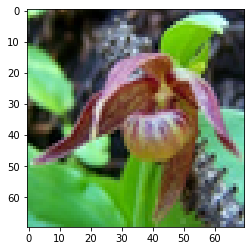

In [6]:
imageArrayData = np.zeros(shape=((len(train_images)),70,70,3), dtype = np.double)
print("Start..")
index = 0 
for image in train_images:
    
#     print(f"Index: {index}")
    print(image)

    img = Image.open(f"{image_path}/{image}")
    #shrinks the image 
    new_image = img.resize((70,70), Image.ANTIALIAS)
    numpydata = np.asarray(new_image) / 255
    print(numpydata.shape)
#     break
    
    try:
        imageArrayData[index] = numpydata
    except:
         numpydata = np.dstack([numpydata, numpydata, numpydata])
         imageArrayData[index] = numpydata
    index += 1




plt.figure()
plt.imshow(numpydata)



         


In [8]:
imageArrayDataTest = np.zeros(shape=((len(test_images)),70,70,3), dtype = np.double)
print("Start..")
index = 0 
for image in test_images:
    
#     print(f"Index: {index}")
    print(image)

    img = Image.open(f"{image_path}/{image}")
    new_image = img.resize((70,70), Image.ANTIALIAS)
    numpydata = np.asarray(new_image) / 255
    print(numpydata.shape)
#     break
    
    try:
        imageArrayDataTest[index] = numpydata
    except:
         numpydata = np.dstack([numpydata, numpydata, numpydata])
         imageArrayDataTest[index] = numpydata
    index += 1


Start..
4010.jpg
(70, 70, 3)
2180.jpg
(70, 70, 3)
6812.jpg
(70, 70, 3)
4903.jpg
(70, 70, 3)
1193.jpg
(70, 70, 3)
4992.jpg
(70, 70, 3)
3553.jpg
(70, 70, 3)
51.jpg
(70, 70, 3)
193.jpg
(70, 70, 3)
5678.jpg
(70, 70, 3)
2614.jpg
(70, 70, 3)
5204.jpg
(70, 70, 3)
775.jpg
(70, 70, 3)
1932.jpg
(70, 70, 3)
2534.jpg
(70, 70, 3)
689.jpg
(70, 70, 3)
2500.jpg
(70, 70, 3)
2916.jpg
(70, 70, 3)
2679.jpg
(70, 70, 3)
6689.jpg
(70, 70, 3)
5757.jpg
(70, 70, 3)
3378.jpg
(70, 70, 3)
2756.jpg
(70, 70, 3)
6499.jpg
(70, 70, 3)
5336.jpg
(70, 70, 3)
4696.jpg
(70, 70, 3)
2635.jpg
(70, 70, 3)
1961.jpg
(70, 70, 3)
2212.jpg
(70, 70, 3)
2634.jpg
(70, 70, 3)
2938.jpg
(70, 70, 3)
1806.jpg
(70, 70, 3)
3368.jpg
(70, 70, 3)
5947.jpg
(70, 70, 3)
5861.jpg
(70, 70, 3)
3314.jpg
(70, 70, 3)
1026.jpg
(70, 70, 3)
3209.jpg
(70, 70, 3)
5066.jpg
(70, 70, 3)
2315.jpg
(70, 70, 3)
2797.jpg
(70, 70, 3)
2310.jpg
(70, 70, 3)
5342.jpg
(70, 70, 3)
2874.jpg
(70, 70, 3)
4335.jpg
(70, 70, 3)
4689.jpg
(70, 70, 3)
1056.jpg
(70, 70, 3)
3828.jpg
(

(70, 70, 3)
5668.jpg
(70, 70, 3)
6230.jpg
(70, 70, 3)
1695.jpg
(70, 70, 3)
3343.jpg
(70, 70, 3)
4001.jpg
(70, 70, 3)
3605.jpg
(70, 70, 3)
5440.jpg
(70, 70, 3)
3795.jpg
(70, 70, 3)
4439.jpg
(70, 70, 3)
2286.jpg
(70, 70, 3)
4153.jpg
(70, 70, 3)
394.jpg
(70, 70, 3)
5540.jpg
(70, 70, 3)
3399.jpg
(70, 70, 3)
330.jpg
(70, 70, 3)
3950.jpg
(70, 70, 3)
2722.jpg
(70, 70, 3)
6765.jpg
(70, 70, 3)
6614.jpg
(70, 70, 3)
4372.jpg
(70, 70, 3)
6519.jpg
(70, 70, 3)
1165.jpg
(70, 70, 3)
3047.jpg
(70, 70, 3)
6372.jpg
(70, 70, 3)
2324.jpg
(70, 70, 3)
5893.jpg
(70, 70, 3)
662.jpg
(70, 70, 3)
4726.jpg
(70, 70, 3)
682.jpg
(70, 70, 3)
408.jpg
(70, 70, 3)
3562.jpg
(70, 70, 3)
7002.jpg
(70, 70, 3)
786.jpg
(70, 70, 3)
3759.jpg
(70, 70, 3)
887.jpg
(70, 70, 3)
820.jpg
(70, 70, 3)
5439.jpg
(70, 70, 3)
898.jpg
(70, 70, 3)
4370.jpg
(70, 70, 3)
4786.jpg
(70, 70, 3)
6722.jpg
(70, 70, 3)
6625.jpg
(70, 70, 3)
2247.jpg
(70, 70, 3)
2427.jpg
(70, 70, 3)
5367.jpg
(70, 70, 3)
7065.jpg
(70, 70, 3)
6382.jpg
(70, 70, 3)
3992.jpg
(

5489.jpg
(70, 70, 3)
620.jpg
(70, 70, 3)
3019.jpg
(70, 70, 3)
4467.jpg
(70, 70, 3)
3216.jpg
(70, 70, 3)
4911.jpg
(70, 70, 3)
2416.jpg
(70, 70, 3)
239.jpg
(70, 70, 3)
2251.jpg
(70, 70, 3)
2042.jpg
(70, 70, 3)
1798.jpg
(70, 70, 3)
2464.jpg
(70, 70, 3)
5165.jpg
(70, 70, 3)
4444.jpg
(70, 70, 3)
2401.jpg
(70, 70, 3)
5692.jpg
(70, 70, 3)
1866.jpg
(70, 70, 3)
477.jpg
(70, 70, 3)
4105.jpg
(70, 70, 3)
2638.jpg
(70, 70, 3)
3969.jpg
(70, 70, 3)
6224.jpg
(70, 70, 3)
1809.jpg
(70, 70, 3)
2478.jpg
(70, 70, 3)
4816.jpg
(70, 70, 3)
5986.jpg
(70, 70, 3)
1343.jpg
(70, 70, 3)
1191.jpg
(70, 70, 3)
5743.jpg
(70, 70, 3)
6564.jpg
(70, 70, 3)
2995.jpg
(70, 70, 3)
6547.jpg
(70, 70, 3)
54.jpg
(70, 70, 3)
5931.jpg
(70, 70, 3)
156.jpg
(70, 70, 3)
6601.jpg
(70, 70, 3)
1881.jpg
(70, 70, 3)
4812.jpg
(70, 70, 3)
243.jpg
(70, 70, 3)
3563.jpg
(70, 70, 3)
3949.jpg
(70, 70, 3)
6262.jpg
(70, 70, 3)
5234.jpg
(70, 70, 3)
5413.jpg
(70, 70, 3)
402.jpg
(70, 70, 3)
1567.jpg
(70, 70, 3)
2830.jpg
(70, 70, 3)
5332.jpg
(70, 70, 3)


2313.jpg
(70, 70, 3)
6836.jpg
(70, 70, 3)
1570.jpg
(70, 70, 3)
3258.jpg
(70, 70, 3)
4777.jpg
(70, 70, 3)
7141.jpg
(70, 70, 3)
8.jpg
(70, 70, 3)
50.jpg
(70, 70, 3)
4489.jpg
(70, 70, 3)
2687.jpg
(70, 70, 3)
3186.jpg
(70, 70, 3)
893.jpg
(70, 70, 3)
5423.jpg
(70, 70, 3)
4624.jpg
(70, 70, 3)
4369.jpg
(70, 70, 3)
2374.jpg
(70, 70, 3)
958.jpg
(70, 70, 3)
2562.jpg
(70, 70, 3)
4938.jpg
(70, 70, 3)
4747.jpg
(70, 70, 3)
5892.jpg
(70, 70, 3)
658.jpg
(70, 70, 3)
3751.jpg
(70, 70, 3)
4671.jpg
(70, 70, 3)
3431.jpg
(70, 70, 3)
293.jpg
(70, 70, 3)
6031.jpg
(70, 70, 3)
3262.jpg
(70, 70, 3)
3933.jpg
(70, 70, 3)
3422.jpg
(70, 70, 3)
2535.jpg
(70, 70, 3)
2307.jpg
(70, 70, 3)
1230.jpg
(70, 70, 3)
5995.jpg
(70, 70, 3)
1851.jpg
(70, 70, 3)
3986.jpg
(70, 70, 3)
6165.jpg
(70, 70, 3)
5007.jpg
(70, 70, 3)
6252.jpg
(70, 70, 3)
3684.jpg
(70, 70, 3)
3096.jpg
(70, 70, 3)
5080.jpg
(70, 70, 3)
3130.jpg
(70, 70, 3)
3652.jpg
(70, 70, 3)
5372.jpg
(70, 70, 3)
4716.jpg
(70, 70, 3)
3356.jpg
(70, 70, 3)
4239.jpg
(70, 70, 3)
1

(70, 70, 3)
2657.jpg
(70, 70, 3)
6796.jpg
(70, 70, 3)
6418.jpg
(70, 70, 3)
711.jpg
(70, 70, 3)
6686.jpg
(70, 70, 3)
6125.jpg
(70, 70, 3)
1596.jpg
(70, 70, 3)
1304.jpg
(70, 70, 3)
3030.jpg
(70, 70, 3)
6994.jpg
(70, 70, 3)
6464.jpg
(70, 70, 3)
2554.jpg
(70, 70, 3)
4770.jpg
(70, 70, 3)
5613.jpg
(70, 70, 3)
1993.jpg
(70, 70, 3)
4940.jpg
(70, 70, 3)
5629.jpg
(70, 70, 3)
2353.jpg
(70, 70, 3)
6259.jpg
(70, 70, 3)
4393.jpg
(70, 70, 3)
6561.jpg
(70, 70, 3)
4730.jpg
(70, 70, 3)
6824.jpg
(70, 70, 3)
6357.jpg
(70, 70, 3)
1899.jpg
(70, 70, 3)
6354.jpg
(70, 70, 3)
5340.jpg
(70, 70, 3)
6246.jpg
(70, 70, 3)
1435.jpg
(70, 70, 3)
6193.jpg
(70, 70, 3)
67.jpg
(70, 70, 3)
4172.jpg
(70, 70, 3)
4196.jpg
(70, 70, 3)
1604.jpg
(70, 70, 3)
2907.jpg
(70, 70, 3)
4756.jpg
(70, 70, 3)
3591.jpg
(70, 70, 3)
6815.jpg
(70, 70, 3)
6037.jpg
(70, 70, 3)
6491.jpg
(70, 70, 3)
2264.jpg
(70, 70, 3)
403.jpg
(70, 70, 3)
2078.jpg
(70, 70, 3)
3965.jpg
(70, 70, 3)
7102.jpg
(70, 70, 3)
5872.jpg
(70, 70, 3)
2101.jpg
(70, 70, 3)
770.j

(70, 70, 3)
6497.jpg
(70, 70, 3)
5913.jpg
(70, 70, 3)
3766.jpg
(70, 70, 3)
6309.jpg
(70, 70, 3)
6817.jpg
(70, 70, 3)
3074.jpg
(70, 70, 3)
7048.jpg
(70, 70, 3)
693.jpg
(70, 70, 3)
4130.jpg
(70, 70, 3)
2472.jpg
(70, 70, 3)
5208.jpg
(70, 70, 3)
6985.jpg
(70, 70, 3)
7095.jpeg
(70, 70, 3)
3937.jpg
(70, 70, 3)
3372.jpg
(70, 70, 3)
1892.jpg
(70, 70, 3)
7092.jpg
(70, 70, 3)
949.jpg
(70, 70, 3)
2177.jpg
(70, 70, 3)
4720.jpg
(70, 70, 3)
1802.jpg
(70, 70, 3)
7082.jpeg
(70, 70, 3)
4915.jpg
(70, 70, 3)
1338.jpg
(70, 70, 3)
6932.jpg
(70, 70, 3)
1819.jpg
(70, 70, 3)
6175.jpg
(70, 70, 3)
1158.jpg
(70, 70, 3)
4542.jpg
(70, 70, 3)
1855.jpg
(70, 70, 3)
1905.jpg
(70, 70, 3)
5331.jpg
(70, 70, 3)
1070.jpg
(70, 70, 3)
6846.jpg
(70, 70, 3)
4230.jpg
(70, 70, 3)
2256.jpg
(70, 70, 3)
823.jpg
(70, 70, 3)
4303.jpg
(70, 70, 3)
687.jpg
(70, 70, 3)


In [9]:
print(imageArrayDataTest.shape)
print(imageArrayData.shape)
print(len(test_labels))
print(len(imageArrayDataTest))
type(imageArrayDataTest)

(2147, 70, 70, 3)
(5009, 70, 70, 3)
2147
2147


numpy.ndarray

## Model


In [10]:
input_size = (70,70,3)

print(input_size)

#convolution base
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_size))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(157
               ))



(70, 70, 3)


In [11]:

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [12]:
# train_images.reshape([-1,100, 100,3])

train_labels = np.array(train_labels)
test_labels= np.array(test_labels)

# print(train_images.shape)
history = model.fit(imageArrayData, train_labels, epochs=8, 
                    validation_data=(imageArrayDataTest, test_labels))

Train on 5009 samples, validate on 2147 samples
Epoch 1/8
5009/5009 [==============================] - 15s 3ms/sample - loss: 4.5182 - accuracy: 0.0737 - val_loss: 4.2273 - val_accuracy: 0.1109
Epoch 2/8
5009/5009 [==============================] - 14s 3ms/sample - loss: 4.0412 - accuracy: 0.1374 - val_loss: 3.9001 - val_accuracy: 0.1537
Epoch 3/8
5009/5009 [==============================] - 14s 3ms/sample - loss: 3.7059 - accuracy: 0.1865 - val_loss: 3.6902 - val_accuracy: 0.1728
Epoch 4/8
5009/5009 [==============================] - 14s 3ms/sample - loss: 3.3975 - accuracy: 0.2422 - val_loss: 3.4984 - val_accuracy: 0.2170
Epoch 5/8
5009/5009 [==============================] - 14s 3ms/sample - loss: 3.1246 - accuracy: 0.2885 - val_loss: 3.3248 - val_accuracy: 0.2380
Epoch 6/8
5009/5009 [==============================] - 14s 3ms/sample - loss: 2.8287 - accuracy: 0.3348 - val_loss: 3.2432 - val_accuracy: 0.2450
Epoch 7/8
5009/5009 [==============================] - 14s 3ms/sample - loss

## Evaluation 

In [13]:

test_loss, test_acc = model.evaluate(imageArrayDataTest,  test_labels, verbose=2)
print(test_acc)

2147/2147 - 1s - loss: 3.3199 - accuracy: 0.2604
0.2603633


We can see that the accuracy is very bad, this is due to the fact that my computer does not have enough memory to process images at a bigger size. Currently it is shrinking it to 70x70 pixels for it to process which is very blurry. It also has a lot of possible class outputs (157) which makes it more difficult to identify.


